In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [4]:
df.shape

(630000, 13)

In [5]:
df_final=pd.concat([df,df_test],axis=0,ignore_index=True)

In [6]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                900000 non-null  int64  
 1   age               900000 non-null  int64  
 2   gender            900000 non-null  object 
 3   course            900000 non-null  object 
 4   study_hours       900000 non-null  float64
 5   class_attendance  900000 non-null  float64
 6   internet_access   900000 non-null  object 
 7   sleep_hours       900000 non-null  float64
 8   sleep_quality     900000 non-null  object 
 9   study_method      900000 non-null  object 
 10  facility_rating   900000 non-null  object 
 11  exam_difficulty   900000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 89.3+ MB


In [7]:
df_final.isnull().sum()

id                       0
age                      0
gender                   0
course                   0
study_hours              0
class_attendance         0
internet_access          0
sleep_hours              0
sleep_quality            0
study_method             0
facility_rating          0
exam_difficulty          0
exam_score          270000
dtype: int64

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'study_hours'}>,
        <Axes: title={'center': 'class_attendance'}>],
       [<Axes: title={'center': 'sleep_hours'}>,
        <Axes: title={'center': 'exam_score'}>]], dtype=object)

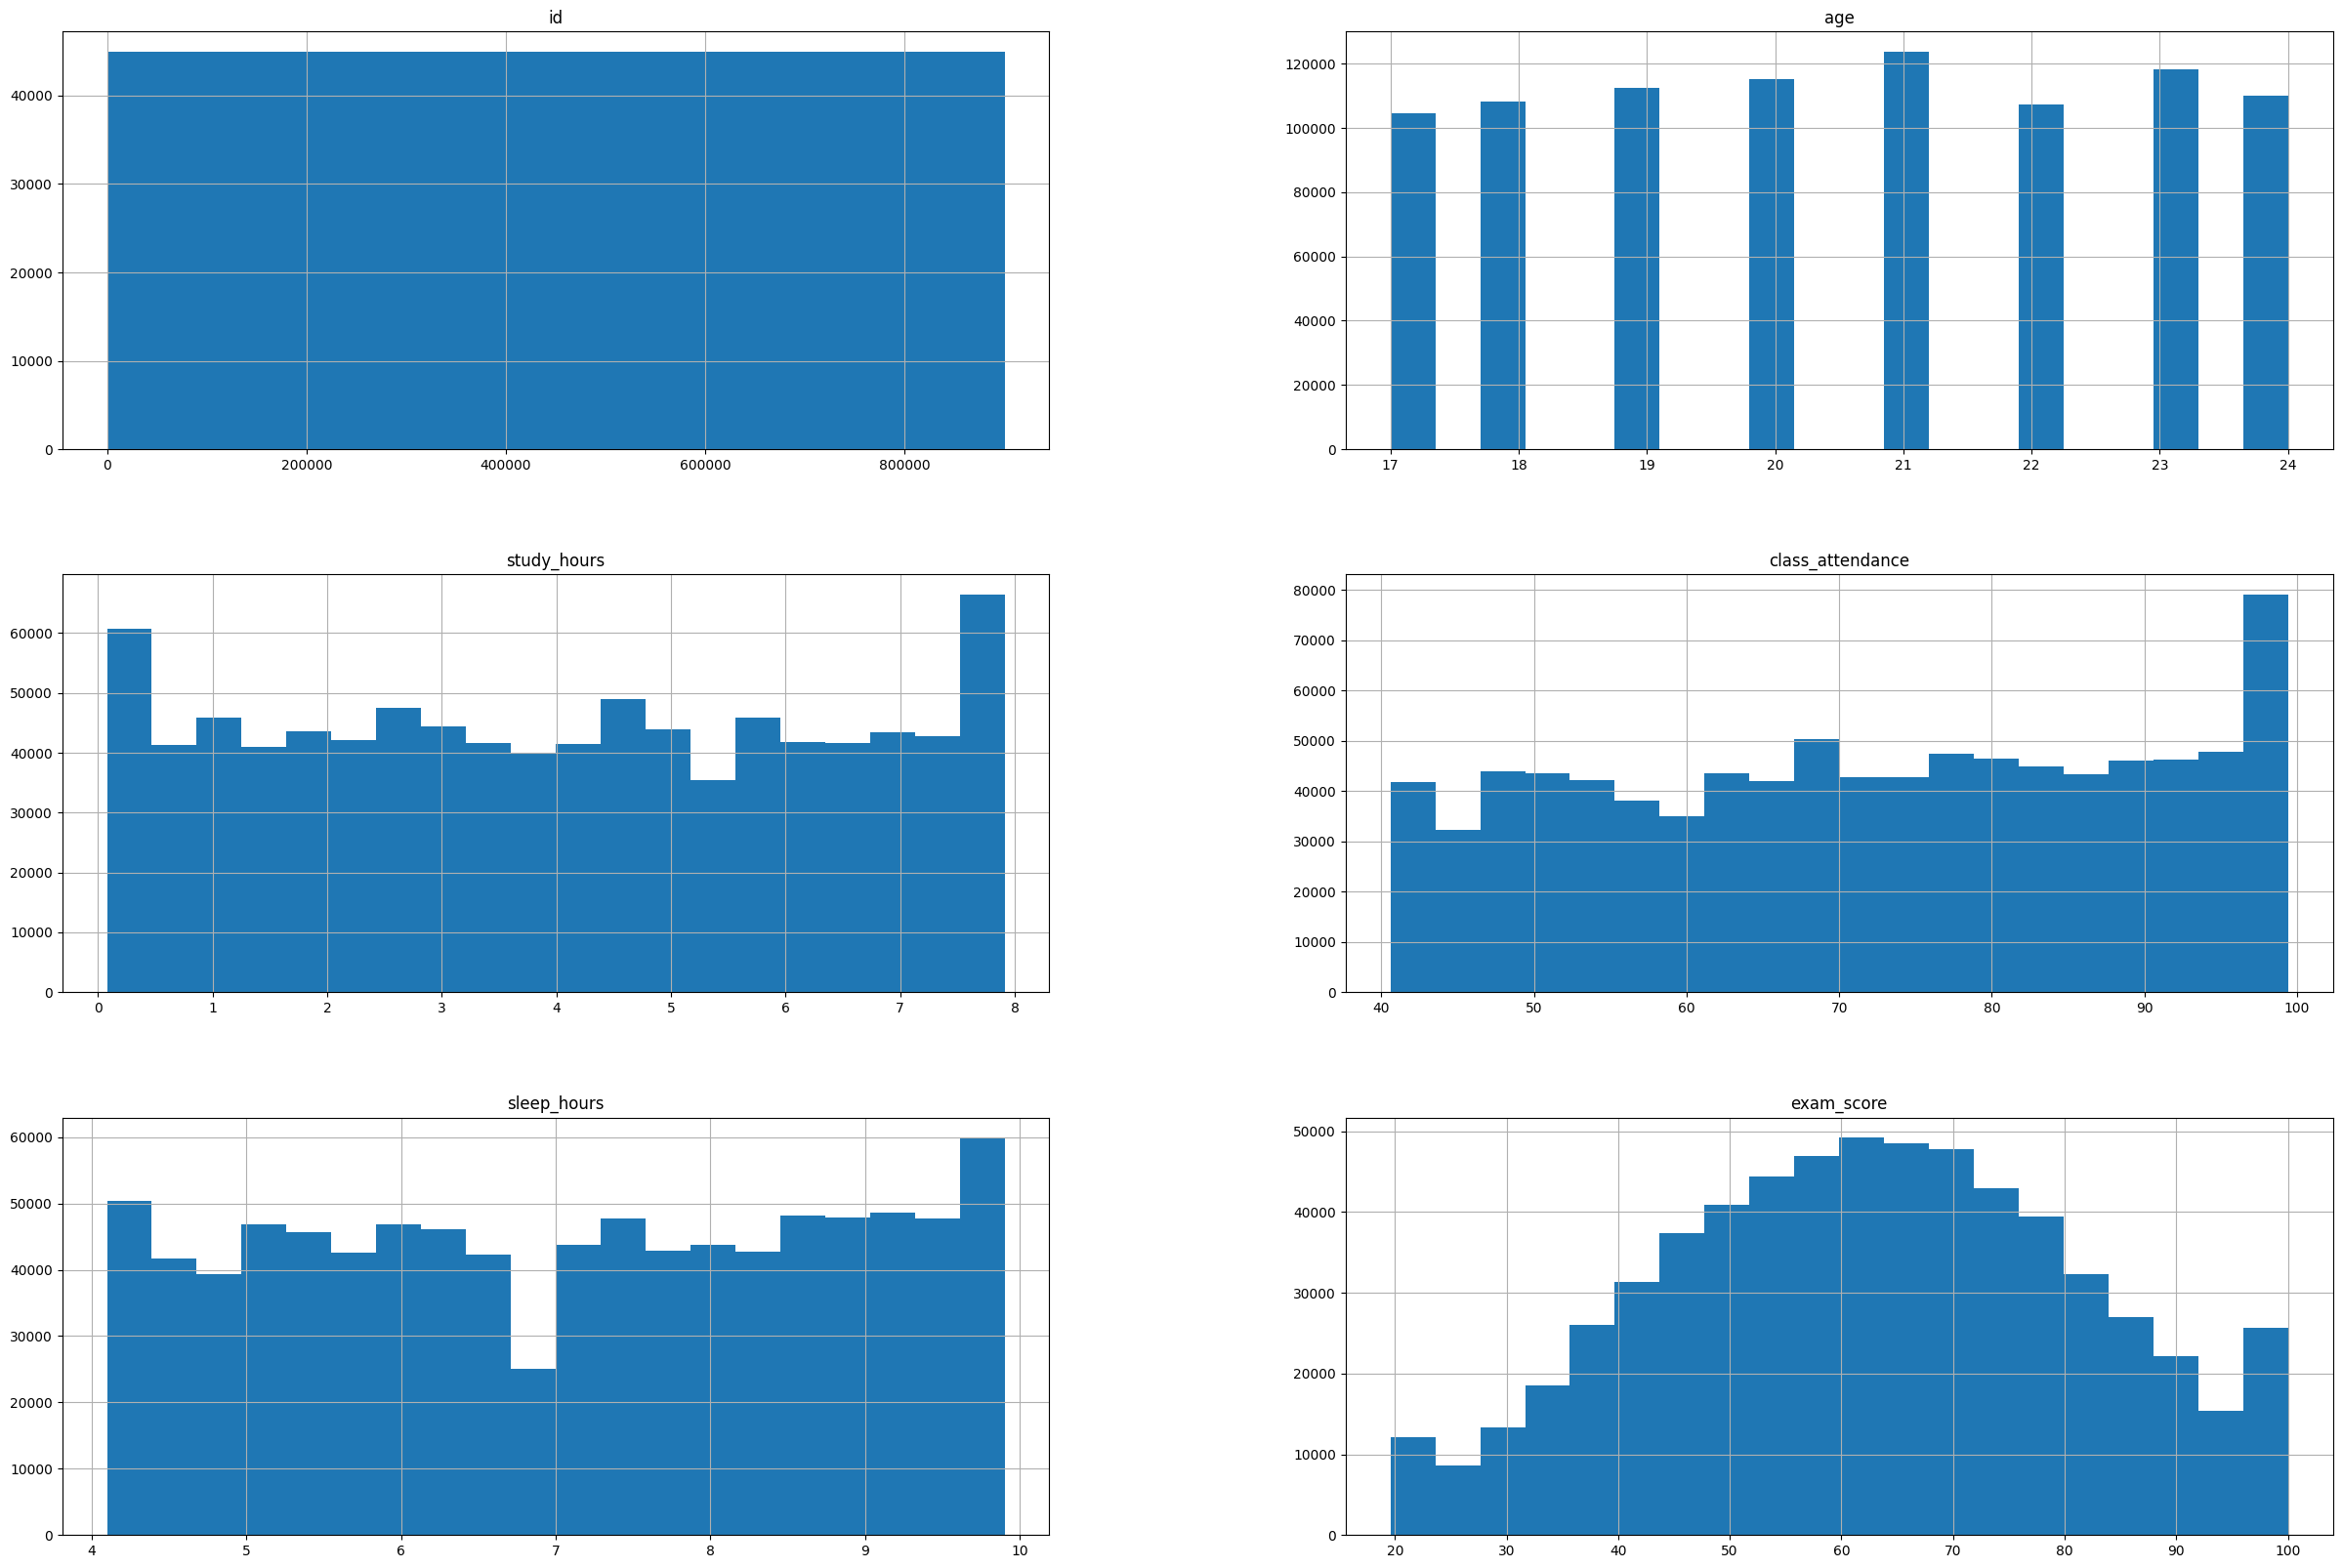

In [8]:
df_final.hist(bins=20,figsize=(30,20))

In [9]:
cat_col=df_final.select_dtypes(include=['object']).columns

In [10]:
X=df_final.iloc[:,1:-1]
y=df_final.iloc[:,-1].values

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(transformers=[('encoding',OneHotEncoder(sparse_output=False),cat_col)],remainder='passthrough')
X=ct.fit_transform(X)

In [12]:
train_x=X[:630000,:]
test_x=X[630000:,:]
train_y=y[:630000]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.2,random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
X_train=st.fit_transform(X_train)
X_test=st.transform(X_test)
test_x=st.transform(test_x)

In [15]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.2)
ridge.fit(X_train,y_train)

,alpha,0.2
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [21]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor( n_estimators=1000,
    learning_rate=0.03,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=0,
    n_jobs=-1)

In [24]:
lgbm.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="rmse"
)

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.03
,n_estimators,1000
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [25]:
y_pred=lgbm.predict(X_test)

c:\Users\choud\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [26]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_pred,y_test)

8.775226873538138